Denoising images 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load image
image = Image.open('img/noise_image.jpg').convert('L')
image_array = np.array(image)

#display image
# plt.imshow(image_array, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')
# plt.show()

# image.show()

In [2]:
#perform SVD decomposition
U, S, Vt = np.linalg.svd(image, full_matrices=False)

#reconstruct image with singular values r 
def reconstruct_image(r):
    S_r = np.zeros((U.shape[1], Vt.shape[0]))
    S_r[:r, :r] = np.diag(S[:r]) # Retain top-r singular values
    denoised_image = np.dot(U, np.dot(S_r, Vt))
    return denoised_image


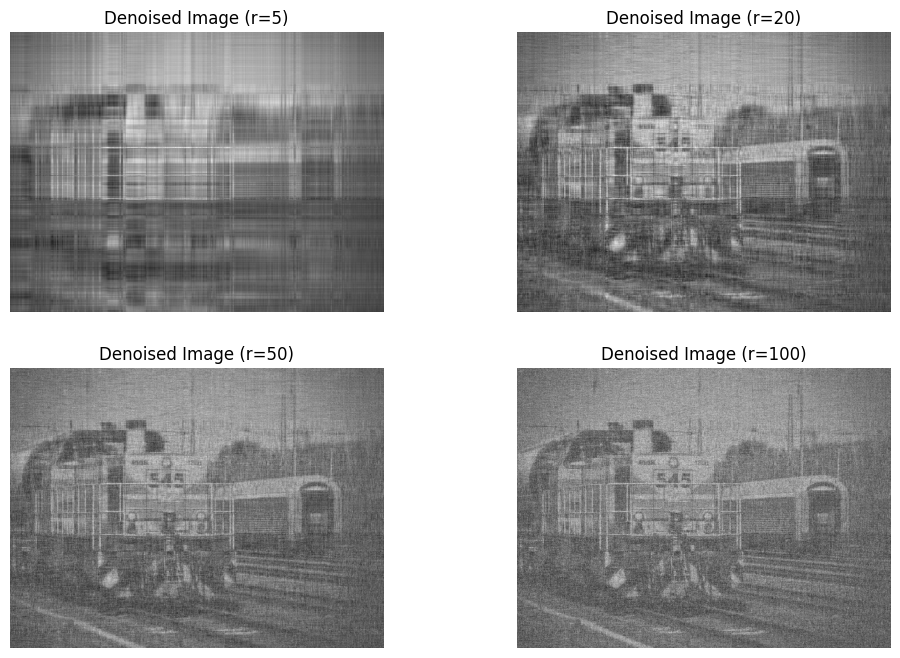

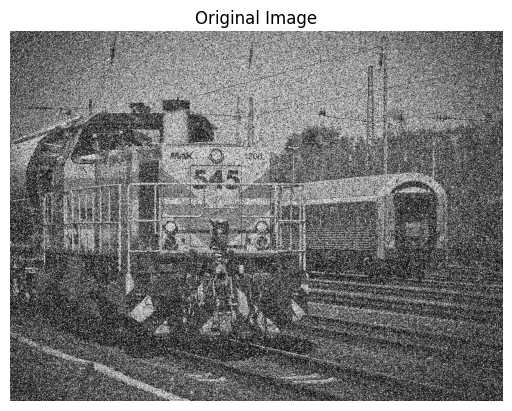

In [4]:
# Denoised value r
r_value = [5, 20, 50, 100]
plt.figure(figsize=(12, 8))

for i, r in enumerate(r_value, 1):
    denoised = reconstruct_image(r)
    plt.subplot(2, 2, i)
    plt.imshow(denoised, cmap='gray')
    plt.title(f'Denoised Image (r={r})')
    plt.axis('off')


plt.figure()
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.show()
